In [10]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# 設定 data_path
dir_data = '../part01/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [12]:
corr=app_train.corr()['TARGET']

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [13]:
corr2=corr.copy()
corr_sort = corr2.abs().sort_values()
corr_mini15=corr_sort[:15]
corr_max15=corr_sort[228:243][::-1]

In [14]:
print(f'前15相關聯:由大到小 \n{corr_max15}')

前15相關聯:由大到小 
EXT_SOURCE_3                                         0.178919
EXT_SOURCE_2                                         0.160472
EXT_SOURCE_1                                         0.155317
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
Name: TARGET, dtype: float64


In [15]:
print(f'最小15個相關聯:由小到大 \n{corr_mini15}')

最小15個相關聯:由小到大 
ORGANIZATION_TYPE_Industry: type 7          0.000094
ORGANIZATION_TYPE_Advertising               0.000117
FLAG_DOCUMENT_20                            0.000215
ORGANIZATION_TYPE_Legal Services            0.000236
NAME_HOUSING_TYPE_Co-op apartment           0.000312
FLAG_DOCUMENT_5                             0.000316
ORGANIZATION_TYPE_Business Entity Type 1    0.000339
FLAG_CONT_MOBILE                            0.000370
OCCUPATION_TYPE_Realty agents               0.000394
WEEKDAY_APPR_PROCESS_START_THURSDAY         0.000446
NAME_TYPE_SUITE_Group of people             0.000452
ORGANIZATION_TYPE_Housing                   0.000464
FLAG_MOBIL                                  0.000534
WALLSMATERIAL_MODE_Others                   0.000628
ORGANIZATION_TYPE_Industry: type 6          0.000652
Name: TARGET, dtype: float64


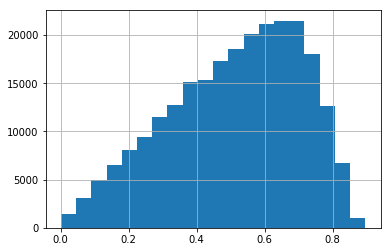

In [16]:
app_train['EXT_SOURCE_3'].hist(bins=20)

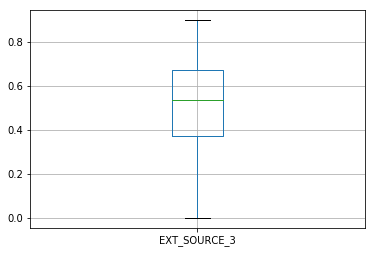

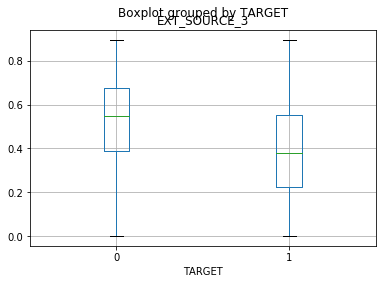

In [17]:
xx=pd.DataFrame(app_train['EXT_SOURCE_3'])
xx.boxplot()
plt.show()

app_train.boxplot(column='EXT_SOURCE_3', by='TARGET')

## 上面的圖可以感覺 EXT_SOURCE_3 的分布
## 與  TARGET = 0 時的 EXT_SOURCE_3很像
## 與TARGET = 1 時的 EXT_SOURCE_3 比較不像
## 所以我們來看看 TARGET = 0 與 TARGET =1 的比例

In [18]:
print(app_train[app_train['TARGET']==0]['EXT_SOURCE_3'].count())
print(app_train[app_train['TARGET']==1]['EXT_SOURCE_3'].count())


227398
19148


## 在EXT_SOURCE_3有值時， TARGET = 0 的數量 遠大於 TARGET = 1 的數量
## 合理解釋 EXT_SOURCE_3 與 (EXT_SOURCE_3| TARGET = 0 ) 分布相近